In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import cv2

In [2]:
p1 = plt.imread('picture1.jpeg')
p2 = plt.imread('picture2.jpeg')
p3 = plt.imread('picture3.jpeg')
p4 = plt.imread('picture4.jpeg')

In [3]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [4]:
I1 = rgb2gray(p1)
I2 = rgb2gray(p2)
I3 = rgb2gray(p3)
I4 = rgb2gray(p4)

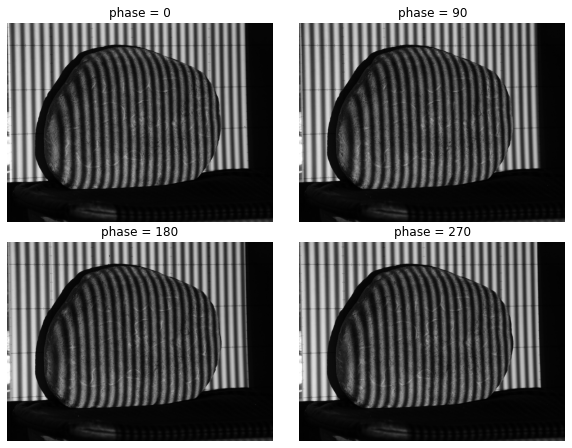

In [5]:
plt.figure(figsize = (10,8))
plt.subplot(221)
plt.imshow(I1, cmap='gray')
plt.axis('off')
plt.title('phase = 0')

plt.subplot(222)
plt.imshow(I2, cmap='gray')
plt.axis('off')
plt.title('phase = 90')

plt.subplot(223)
plt.imshow(I3, cmap='gray')
plt.axis('off')
plt.title('phase = 180')

plt.subplot(224)
plt.imshow(I4, cmap='gray')
plt.axis('off')
plt.title('phase = 270')
plt.subplots_adjust(wspace=0.1, hspace=0.01)
plt.savefig('Figures/original_images.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Cropping Object First (Removing Black Area)

In [28]:
def transform_perspective(image):
    '''
    code from: https://www.geeksforgeeks.org/perspective-transformation-python-opencv/
    '''
    pts1 = np.float32([[0, 0], [1190, 0], [12, 788], [1210, 730]])
    pts2 = np.float32([[0, 0], [1190, 0], [0, 789], [1190, 789]])
    
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (1190, 789))
    
    return result

In [29]:
I1_ = transform_perspective(I1)
I2_ = transform_perspective(I2)
I3_ = transform_perspective(I3)
I4_ = transform_perspective(I4)

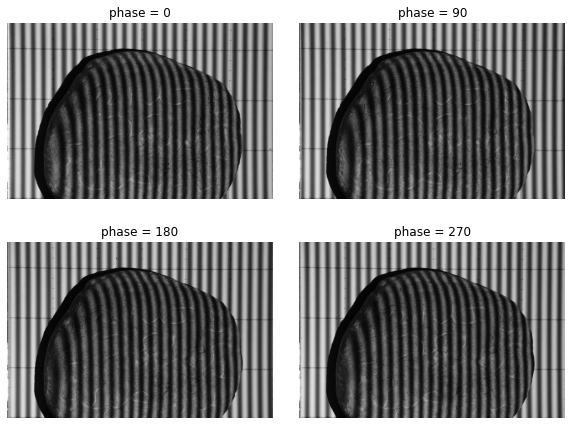

In [30]:
plt.figure(figsize = (10,8))
plt.subplot(221)
plt.imshow(I1_, cmap='gray')
plt.axis('off')
plt.title('phase = 0')

plt.subplot(222)
plt.imshow(I2_, cmap='gray')
plt.axis('off')
plt.title('phase = 90')

plt.subplot(223)
plt.imshow(I3_, cmap='gray')
plt.axis('off')
plt.title('phase = 180')

plt.subplot(224)
plt.imshow(I4_, cmap='gray')
plt.axis('off')
plt.title('phase = 270')
plt.subplots_adjust(wspace=0.1, hspace=0.01)
plt.savefig('Figures/transformed_images.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Cropping Region of Interest and Background

In [217]:
l1, l2 = 589, 589 + 200
w1, w2 = 450, 450 + 200

J1 = I1_[l1:l2,w1:w2]
J2 = I2_[l1:l2,w1:w2]
J3 = I3_[l1:l2,w1:w2]
J4 = I4_[l1:l2,w1:w2]

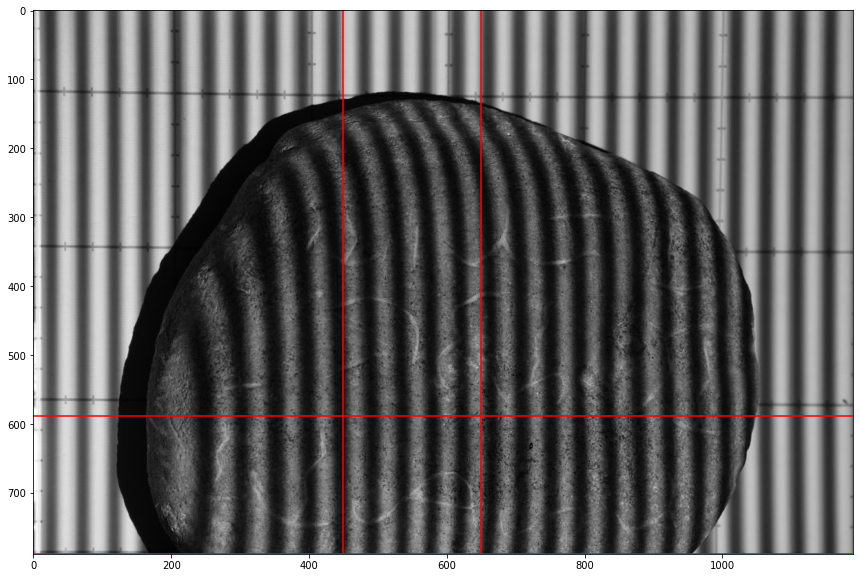

In [218]:
plt.figure(figsize = (20,10))
plt.axvline(x = w1, color = 'red')
plt.axvline(x = w2, color = 'red')
plt.axhline(y = l1, color = 'red')
plt.axhline(y = l2, color = 'red')
plt.imshow(I1_, cmap = 'gray')

In [219]:
R1 = np.zeros((1190,789)).T
R2 = np.zeros((1190,789)).T
R3 = np.zeros((1190,789)).T
R4 = np.zeros((1190,789)).T

R1[:,:] = I1_[:100,:].mean(axis=0)
R2[:,:] = I2_[:100,:].mean(axis=0)
R3[:,:] = I3_[:100,:].mean(axis=0)
R4[:,:] = I4_[:100,:].mean(axis=0)

In [220]:
l1_, l2_ = 0, 200
w1_, w2_ = 990, 1190

l1_, l2_ = l1, l2
w1_, w2_, w1, w2

# BG1 = I1_[l1_:l2_,w1_:w2_]
# BG2 = I2_[l1_:l2_,w1_:w2_]
# BG3 = I3_[l1_:l2_,w1_:w2_]
# BG4 = I4_[l1_:l2_,w1_:w2_]

BG1 = R1[l1_:l2_,w1_:w2_]
BG2 = R2[l1_:l2_,w1_:w2_]
BG3 = R3[l1_:l2_,w1_:w2_]
BG4 = R4[l1_:l2_,w1_:w2_]

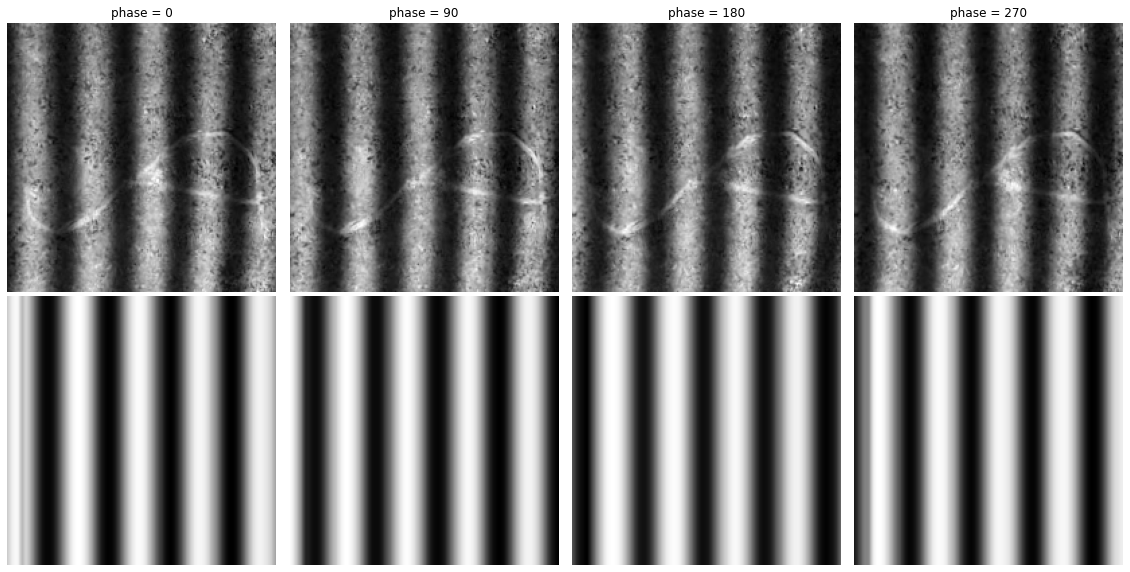

In [221]:
plt.figure(figsize = (20,10))
plt.subplot(241)
plt.imshow(J1, cmap='gray')
plt.axis('off')
plt.title('phase = 0')

plt.subplot(242)
plt.imshow(J2, cmap='gray')
plt.axis('off')
plt.title('phase = 90')

plt.subplot(243)
plt.imshow(J3, cmap='gray')
plt.axis('off')
plt.title('phase = 180')

plt.subplot(244)
plt.imshow(J4, cmap='gray')
plt.axis('off')
plt.title('phase = 270')

plt.subplot(245)
plt.imshow(BG1, cmap='gray')
plt.axis('off')

plt.subplot(246)
plt.imshow(BG2, cmap='gray')
plt.axis('off')

plt.subplot(247)
plt.imshow(BG3, cmap='gray')
plt.axis('off')

plt.subplot(248)
plt.imshow(BG4, cmap='gray')
plt.axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.01)
plt.savefig('Figures/ROI_bg.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Phase Calculation, Wrapping, and Unwrapping

In [222]:
def calculate_phase(I1,I2,I3,I4):
    N = I4 - I2
    D = I1 - I3
    phase = np.arctan2(N,D).astype(float)
    return phase

In [223]:
def calculate_phase_with_modulation(I1,I2,I3,I4):
    I = []
    phi = [0, np.pi/2, np.pi, 1.5*np.pi]
    I = [np.mean(I1) + I1 * np.cos(phi[0]), np.mean(I2) - I2 * np.sin(phi[1]), np.mean(I3) - I3 * np.cos(phi[2]), np.mean(I4) + I4 * np.sin(phi[3])]
    
    N = I[3] - I[1]
    D = I[0] - I[2]
    phase = np.arctan2(N,D).astype(float)
    return phase

In [224]:
phase_obj = calculate_phase_with_modulation(J1, J2, J3, J4)
phase_ref = calculate_phase_with_modulation(BG1, BG2, BG3, BG4)

In [225]:
Z_obj = np.unwrap(np.unwrap(phase_obj, axis = 1), axis = 0)
Z_ref = np.unwrap(np.unwrap(phase_ref, axis = 1), axis = 0)

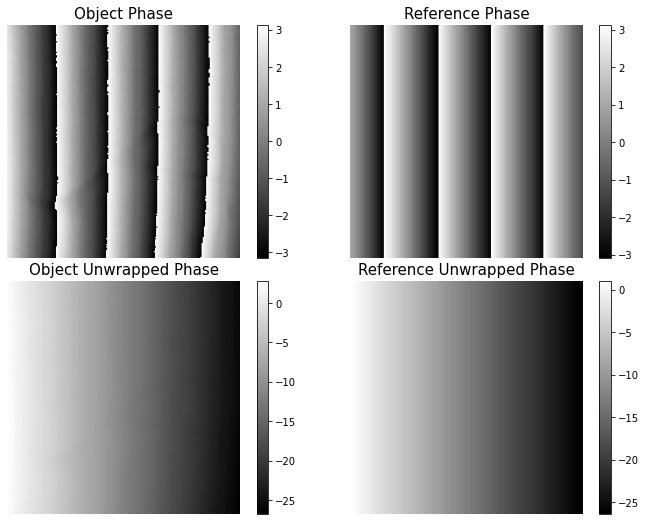

In [226]:
plt.figure(figsize = (8*1.5,6*1.5))
plt.subplot(221)
plt.imshow(phase_obj, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Object Phase', fontsize = 15)

plt.subplot(222)
plt.imshow(phase_ref, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Reference Phase', fontsize = 15)

plt.subplot(223)
plt.imshow(Z_obj, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Object Unwrapped Phase', fontsize = 15)

plt.subplot(224)
plt.imshow(Z_ref, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Reference Unwrapped Phase', fontsize = 15)

plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig('Figures/phase_wrap_unwrap.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Object Reconstruction

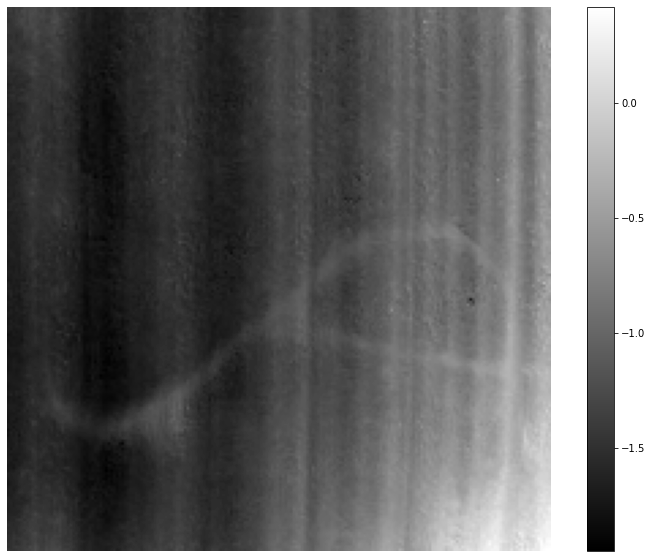

In [227]:
recons = Z_ref - Z_obj

plt.figure(figsize = (13, 10))
plt.imshow(recons, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.savefig('Figures/recons_2D.png', dpi = 300, bbox_inches = 'tight')
plt.show()

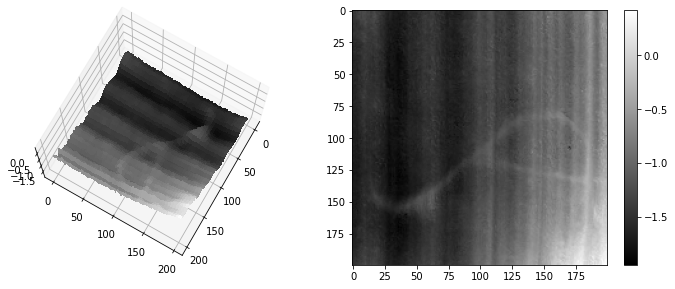

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0, 200, 1)
y = np.arange(0, 200, 1)

X, Y = np.meshgrid(x,y)
Z = recons

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gray)
mappable.set_array(Z)

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 75, azim = 30)

ax2 = fig.add_subplot(122)
ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm)

plt.colorbar(mappable)
plt.savefig('Figures/recons.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()

### Apply Fourier Filtering to make the quality of reconstructed image better

In [258]:
def visualize_image_created_mask(image, width_center_square, width_line):
    w,h = image.shape
    mask = np.ones([w,h])

    center = int(w/2) , int(h/2)
    mask[0:center[0]-width_center_square, center[1]- width_line: center[1]+ width_line] = 0
    mask[center[0]+width_center_square:w, center[1]- width_line: center[1]+ width_line] = 0
    mask[center[0]-width_line:center[0]+width_line, 0: center[1]- width_center_square] = 0
    mask[center[0]-width_line:center[0]+width_line, center[1]+ width_center_square:h] = 0
    
    image_FT = np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
    convolve = np.abs(np.fft.ifft2(np.fft.fftshift(mask)* np.fft.fft2(image)))
    
    fig = plt.figure(figsize = (18,12))
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    
    
    ax1.imshow(image, cmap = 'gray')
    ax2.imshow(image_FT, cmap = 'gray')
    ax3.imshow(mask, cmap='gray')
    ax4.imshow(convolve, cmap='gray')
    
    ax1.set_title('reconstructed object')
    ax2.set_title('Fourier transform (log)')
    ax3.set_title('mask used')
    ax4.set_title('Recovered reconstructed image')
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax3.set_axis_off()
    ax4.set_axis_off()
    
    plt.savefig('Figures/fourier.png', dpi = 300, bbox_inches = 'tight')
    plt.show()
    
    return convolve

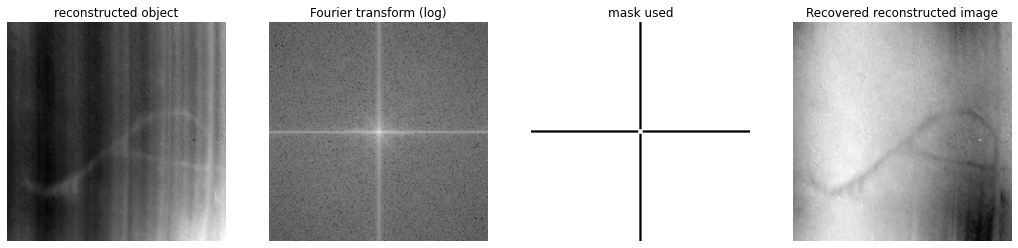

In [259]:
c1 = visualize_image_created_mask(recons, 2, 1)

Using a mask manually created


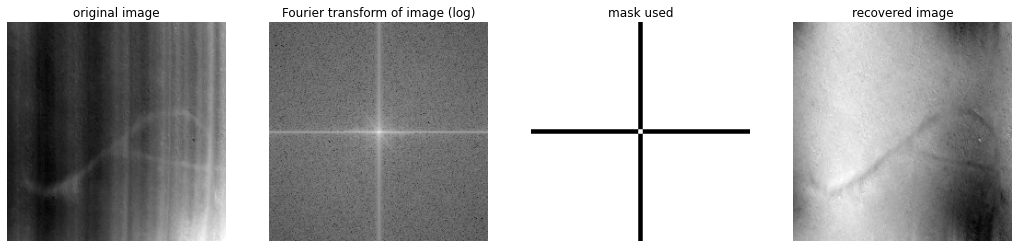

In [255]:
c2 = visualize_image_created_mask(recons, 2, 2)

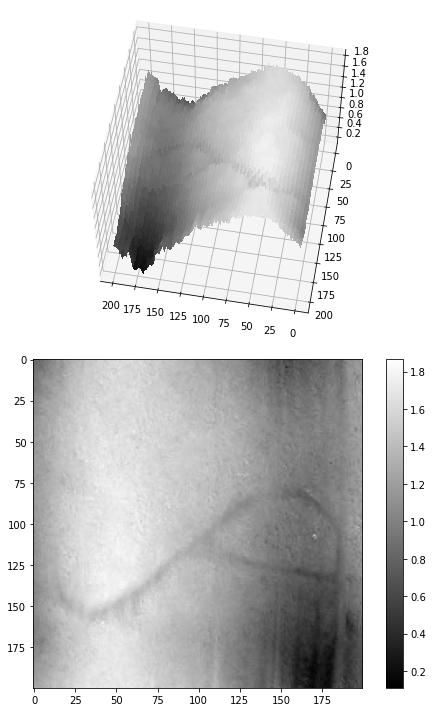

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0, 200, 1)
y = np.arange(0, 200, 1)

X, Y = np.meshgrid(x,y)
Z = c1

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gray)
mappable.set_array(Z)

fig = plt.figure(figsize=(7,10))

ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 55, azim = 100)

ax2 = fig.add_subplot(212)
ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm)

plt.colorbar(mappable)
plt.savefig('Figures/recons_fft.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()

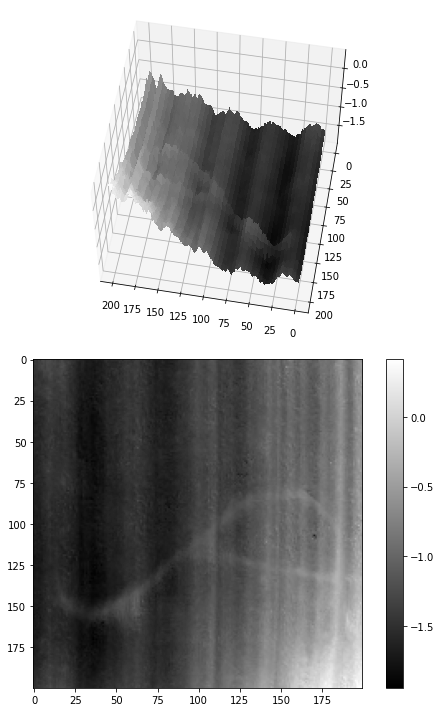

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0, 200, 1)
y = np.arange(0, 200, 1)

X, Y = np.meshgrid(x,y)
Z = recons

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gray)
mappable.set_array(Z)

fig = plt.figure(figsize=(7,10))

ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 55, azim = 100)

ax2 = fig.add_subplot(212)
ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm)

plt.colorbar(mappable)
plt.savefig('Figures/recons_orig.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()